170500096/170498071 [==============================] - 4s 0us/step
Epoch :0 - Batch idx :0 - Loss:2.3177506923675537
Epoch :0 - Batch idx :1 - Loss:8.57343864440918
Epoch :0 - Batch idx :2 - Loss:6.5810394287109375
Epoch :0 - Batch idx :3 - Loss:4.467694282531738
Epoch :0 - Batch idx :4 - Loss:3.7359657287597656
Epoch :0 - Batch idx :5 - Loss:4.167079925537109
Epoch :0 - Batch idx :6 - Loss:5.743652820587158
Epoch :0 - Batch idx :7 - Loss:3.7072863578796387
Epoch :0 - Batch idx :8 - Loss:3.0809807777404785
Epoch :0 - Batch idx :9 - Loss:2.9446425437927246
Epoch :0 - Batch idx :10 - Loss:3.0153589248657227
Epoch :0 - Batch idx :11 - Loss:2.994147777557373
Epoch :0 - Batch idx :12 - Loss:2.7976694107055664
Epoch :0 - Batch idx :13 - Loss:2.471683979034424
Epoch :0 - Batch idx :14 - Loss:2.235867500305176
Epoch :0 - Batch idx :15 - Loss:2.6467807292938232
Epoch :0 - Batch idx :16 - Loss:2.6145620346069336
Epoch :0 - Batch idx :17 - Loss:2.4750964641571045
Epoch :0 - Batch idx :18 - Loss:2

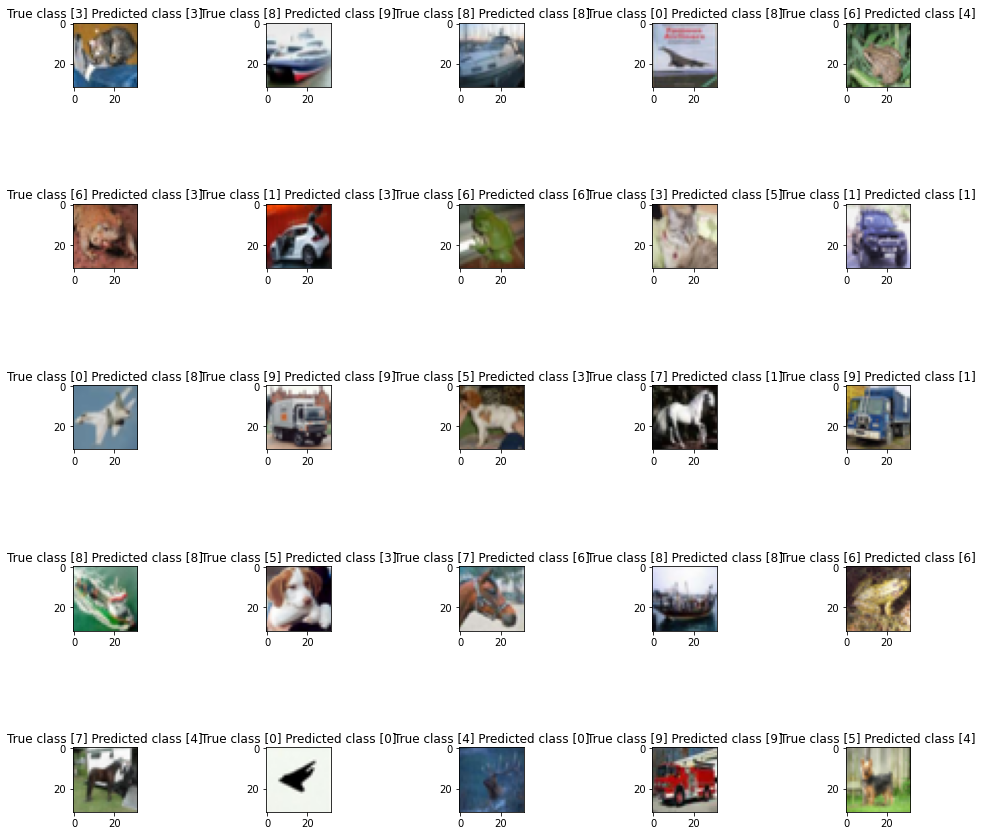

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def data_generator(x,y,batch_size,epochs):
  dataset = tf.data.Dataset.from_tensor_slices((tf.cast(x/255.0,tf.float32),tf.cast(y,tf.int32)))
  dataset = dataset.batch(batch_size)
  dataset = dataset.repeat(epochs)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

class CNN_model(tf.keras.Model):
  def __init__(self):
    super(CNN_model,self).__init__()
    self.kernel_init = tf.keras.initializers.glorot_normal()
    self.conv = tf.keras.layers.Conv2D(64,3,kernel_initializer=self.kernel_init)
    self.bn = tf.keras.layers.BatchNormalization()
    self.flatten = tf.keras.layers.Flatten()
    self.out = tf.keras.layers.Dense(10,activation='softmax')
  
  def call(self,x0):
    x=self.conv(x0)
    x=self.bn(x)
    x=self.flatten(x)
    x=self.out(x)
    return x

def train_step(inputs,outputs,model,loss,optimizer):
  with tf.GradientTape() as t:
    y_pred = model(inputs)
    loss_val = loss(outputs,y_pred)
  grad = t.gradient(loss_val,model.trainable_variables)
  optimizer.apply_gradients(zip(grad,model.trainable_variables))
  return loss_val

def predictions(dataset,model):
  plt.figure(figsize=(15,15))
  for i in range(25):
    for val in dataset.take(1):
      plt.subplot(5,5,i+1)
      plt.imshow(val[0][i])
      y_pred=model.predict(tf.expand_dims(val[0][i],0))
      y_pred=np.argmax(y_pred,axis=1)
      plt.title("True class " + str(val[1][i].numpy()) +
                " Predicted class " + str(y_pred))
      plt.subplots_adjust(wspace=2, hspace=1)
  plt.show()

def main():
  batch_size = 128
  epochs = 2

  (x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()
  train_dataset = data_generator(x_train,y_train,batch_size,epochs)
  test_dataset = data_generator(x_test,y_test,batch_size,epochs)
  
  model = CNN_model()
  optimizer = tf.keras.optimizers.Adam()
  loss = tf.keras.losses.SparseCategoricalCrossentropy()

  for epoch in range(epochs):
    for idx, batch in enumerate(train_dataset):
      loss_ = train_step(batch[0],batch[1],model,loss,optimizer)
      print(f'Epoch :{epoch} - Batch idx :{idx} - Loss:{loss_}') 
  
  predictions(test_dataset,model)

if __name__ == '__main__':
  main()